In [1]:
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_excel(r'data_test.xlsx',sheet_name='Sheet1', skiprows=1)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          482 non-null    datetime64[ns]
 1   Open          481 non-null    float64       
 2   High          481 non-null    float64       
 3   Low           481 non-null    float64       
 4   Close         481 non-null    float64       
 5   boll1 Lower   481 non-null    float64       
 6   boll1 Upper   481 non-null    float64       
 7   boll1 Mid     481 non-null    float64       
 8   stoc_sl1 %KS  481 non-null    float64       
 9   stoc_sl1 %DS  481 non-null    float64       
 10  cci1 CCI      481 non-null    float64       
 11  rsi1 RSI      481 non-null    float64       
 12  std_dev1      481 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 49.1 KB


In [4]:
df.rename(columns = {'rsi1 RSI':'RSI','cci_std1 CCIStd':'CCI','std_dev1':'STD','boll1 Lower':'boll'},inplace = True)

In [5]:
df

,Time,Open,High,Low,Close,boll,boll1 Upper,boll1 Mid,stoc_sl1 %KS,stoc_sl1 %DS,cci1 CCI,RSI,STD
0,2019-10-23,1.1125,1.1139,1.1105,1.1128,1.0856,1.1177,1.1017,81.5505,87.3496,80.9270,72.9630,0.0015
1,2019-10-24,1.1131,1.1162,1.1091,1.1102,1.0868,1.1184,1.1026,74.5426,81.1317,63.9798,67.0330,0.0020
2,2019-10-25,1.1105,1.1123,1.1071,1.1079,1.0878,1.1187,1.1033,68.4874,74.8602,26.7389,62.2159,0.0024
3,2019-10-28,1.1080,1.1106,1.1074,1.1098,1.0899,1.1187,1.1043,63.6383,68.8895,20.3850,64.4863,0.0018
4,2019-10-29,1.1099,1.1118,1.1072,1.1113,1.0915,1.1189,1.1052,63.8659,65.3306,23.0599,66.2124,0.0016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2021-08-20,1.1677,1.1705,1.1662,1.1695,1.1652,1.1910,1.1781,9.2230,9.9199,-102.8018,37.1350,0.0033
478,2021-08-23,1.1694,1.1750,1.1691,1.1742,1.1650,1.1910,1.1780,17.6625,10.7665,-39.3584,44.6483,0.0021
479,2021-08-24,1.1745,1.1765,1.1725,1.1756,1.1647,1.1906,1.1777,31.8947,19.5934,11.4720,46.6920,0.0029
480,2021-08-25,1.1756,1.1759,1.1731,1.1743,1.1645,1.1898,1.1772,42.8798,30.8123,22.4440,45.0294,0.0031


In [6]:
df = df.set_index('Time ')

In [7]:
data = df.filter(regex='2020-|2021-',axis=0)
data = data.reset_index()
data = data.drop(columns = 'Time ')

In [8]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'boll', 'boll1 Upper', 'boll1 Mid',
       'stoc_sl1 %KS', 'stoc_sl1 %DS', 'cci1 CCI', 'RSI', 'STD'],
      dtype='object')

In [9]:
data_open = data.filter(regex='Open|High|Low|Close|CCI',axis=1)
data_high = data.filter(regex='High|CCI|RSI|STD|boll1 Upper',axis=1)
data_low = data.filter(regex='Low|CCI|RSI|STD',axis=1)
data_close = data.filter(regex='Open|High|Low|Close|CCI',axis=1)

In [10]:
data_high

,High,boll1 Upper,cci1 CCI,RSI,STD
0,1.1274,1.1239,122.0506,59.0486,0.0045
1,1.1224,1.1243,59.7434,54.2091,0.0020
2,1.1179,1.1242,5.7613,53.2478,0.0023
3,1.1205,1.1244,50.9302,56.3939,0.0023
4,1.1197,1.1243,6.0239,51.3584,0.0024
...,...,...,...,...,...
427,1.1705,1.1910,-102.8018,37.1350,0.0033
428,1.1750,1.1910,-39.3584,44.6483,0.0021
429,1.1765,1.1906,11.4720,46.6920,0.0029
430,1.1759,1.1898,22.4440,45.0294,0.0031


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# OPEN

In [12]:
dataset = data_open.values
#dataset_test = data_test.values

In [13]:
scaler = MinMaxScaler()

In [14]:
training_data = scaler.fit_transform(dataset)
training_data

array([[0.33473558, 0.3008447 , 0.31776275, 0.33213429, 0.7593574 ],
       [0.33293269, 0.26835608, 0.32206515, 0.3057554 , 0.63605157],
       [0.30709135, 0.23911631, 0.29870928, 0.30035971, 0.52922109],
       ...,
       [0.65264423, 0.61988304, 0.66871543, 0.65767386, 0.54052256],
       [0.65925481, 0.61598441, 0.6724032 , 0.6498801 , 0.56223613],
       [       nan,        nan,        nan,        nan,        nan]])

In [15]:
sc = MinMaxScaler()

In [16]:
features = training_data
target = training_data[:,0] #ราคาopen

In [17]:
TimeseriesGenerator(features, target,length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.33473558, 0.3008447 , 0.31776275, 0.33213429, 0.7593574 ],
         [0.33293269, 0.26835608, 0.32206515, 0.3057554 , 0.63605157]]]),
 array([0.30709135]))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 123, shuffle = False)

In [19]:
look_back = 30
batch_size = 32
num_feture = x_train.shape[1]
train_generator = TimeseriesGenerator(x_train, y_train,length=look_back, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length=look_back, sampling_rate=1, batch_size=batch_size)

In [20]:
test_generator

In [21]:
model = Sequential()

In [22]:
model.add(LSTM(128, input_shape=(look_back, num_feture),return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM( 64, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit_generator(train_generator, epochs=300).history
model.save('lstm_open_multi.h5')

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
9/9 [==============================] - 19s 61ms/step - loss: 0.0595
Epoch 2/300
9/9 [==============================] - 1s 57ms/step - loss: 0.0847
Epoch 3/300
9/9 [==============================] - 1s 58ms/step - loss: 0.0303
Epoch 4/300
9/9 [==============================] - 1s 59ms/step - loss: 0.0278
Epoch 5/300
9/9 [==============================] - 1s 59ms/step - loss: 0.0191
Epoch 6/300
9/9 [==============================] - 1s 60ms/step - loss: 0.0082
Epoch 7/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0114
Epoch 8/300
9/9 [==============================] - 1s 60ms/step - loss: 0.0136
Epoch 9/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0113
Epoch 10/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0118
Epoch 11/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0132
Epoch 12/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0147
Epoch 13/300
9/9 [==============================

9/9 [==============================] - 1s 67ms/step - loss: 0.0044
Epoch 104/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0038
Epoch 105/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0061
Epoch 106/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0043
Epoch 107/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0041
Epoch 108/300
9/9 [==============================] - 1s 66ms/step - loss: 0.0026
Epoch 109/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0037
Epoch 110/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0045
Epoch 111/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0042
Epoch 112/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0039
Epoch 113/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0041
Epoch 114/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0036
Epoch 115/300
9/9 [=======================

9/9 [==============================] - 1s 71ms/step - loss: 0.0029
Epoch 205/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0031
Epoch 206/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0024
Epoch 207/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0022
Epoch 208/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0022
Epoch 209/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0021
Epoch 210/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0022
Epoch 211/300
9/9 [==============================] - 1s 74ms/step - loss: 0.0019
Epoch 212/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0019
Epoch 213/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0015
Epoch 214/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0025
Epoch 215/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0026
Epoch 216/300
9/9 [=======================

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           68608     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 249,665
Trainable params: 249,665
Non-trainable params: 0
__________________________________________________

In [24]:
predictions = model.predict_generator(test_generator)

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [25]:
rmse = np.sqrt(np.mean(predictions - y_test[-predictions.shape[0]])**2)
rmse

0.05099618062376976

In [26]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][look_back:])], axis=1)
rev_trans = scaler.inverse_transform(df_pred)
open_pred = rev_trans[:,0]
open_pred = open_pred.reshape(-1,1)
df_open = pd.DataFrame(data.iloc[-len(open_pred):,0])
df_open['prediction_open'] = open_pred
df_open

,Open,prediction_open
332,1.1915,1.193524
333,1.1891,1.193411
334,1.1912,1.194208
335,1.1948,1.196387
336,1.1979,1.199740
...,...,...
427,1.1677,1.172732
428,1.1694,1.172667
429,1.1745,1.176534
430,1.1756,1.179208


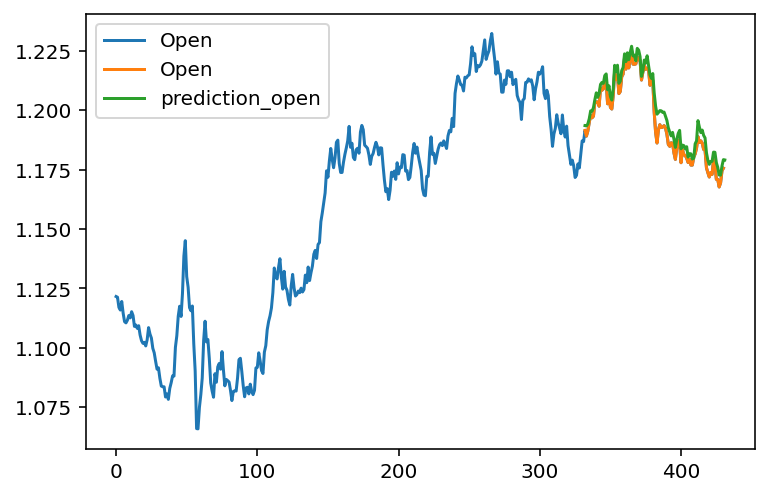

In [27]:
plt.plot(data['Open'])
plt.plot(df_open['Open'])
plt.plot(df_open['prediction_open'])
plt.legend(['Open','Open','prediction_open'])

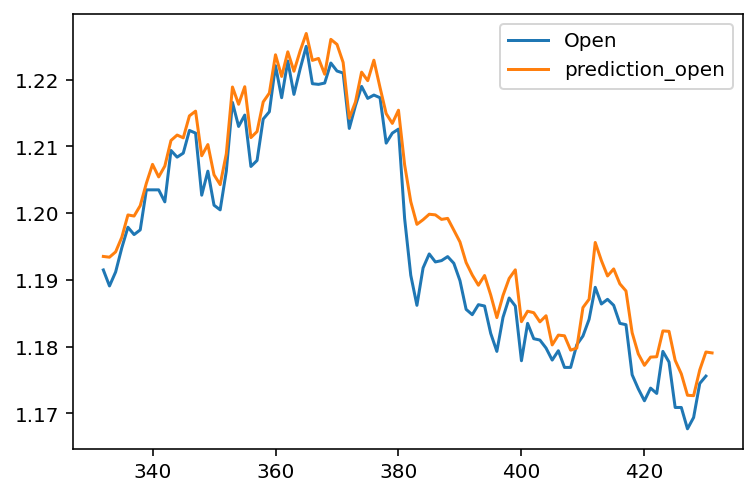

In [28]:
#ZOOM
plt.plot(df_open['Open'])
plt.plot(df_open['prediction_open'])
plt.legend(['Open','prediction_open'])

# HIGH

In [29]:
dataset = data_high.values
#dataset_test = data_test.values

In [30]:
scaler = MinMaxScaler()

In [31]:
training_data = scaler.fit_transform(dataset)
training_data

array([[0.3008447 , 0.19942197, 0.7593574 , 0.61966391, 0.21978022],
       [0.26835608, 0.20231214, 0.63605157, 0.53595219, 0.08241758],
       [0.23911631, 0.2015896 , 0.52922109, 0.51932401, 0.0989011 ],
       ...,
       [0.61988304, 0.68135838, 0.54052256, 0.40592443, 0.13186813],
       [0.61598441, 0.67557803, 0.56223613, 0.37716544, 0.14285714],
       [       nan,        nan,        nan,        nan,        nan]])

In [32]:
sc = MinMaxScaler()

In [33]:
features = training_data
target = training_data[:,0]

In [34]:
TimeseriesGenerator(features, target,length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.3008447 , 0.19942197, 0.7593574 , 0.61966391, 0.21978022],
         [0.26835608, 0.20231214, 0.63605157, 0.53595219, 0.08241758]]]),
 array([0.23911631]))

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 123, shuffle = False)

In [36]:
look_back = 30
batch_size = 32
num_feture = x_train.shape[1]
train_generator = TimeseriesGenerator(x_train, y_train,length=look_back, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length=look_back, sampling_rate=1, batch_size=batch_size)

In [37]:
test_generator

In [38]:
model = Sequential()

In [39]:
model.add(LSTM(128, input_shape=(look_back, num_feture),return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM( 64, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit_generator(train_generator, epochs=300).history
model.save('lstm_high_multi.h5')

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
9/9 [==============================] - 5s 70ms/step - loss: 0.1961
Epoch 2/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0468
Epoch 3/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0261
Epoch 4/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0185
Epoch 5/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0115
Epoch 6/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0177
Epoch 7/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0088
Epoch 8/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0084
Epoch 9/300
9/9 [==============================] - 1s 71ms/step - loss: 0.0084
Epoch 10/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0080
Epoch 11/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0092
Epoch 12/300
9/9 [==============================] - 1s 72ms/step - loss: 0.0090
Epoch 13/300
9/9 [==============================]

9/9 [==============================] - 1s 70ms/step - loss: 0.0032
Epoch 104/300
9/9 [==============================] - 1s 72ms/step - loss: 0.0039
Epoch 105/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0042
Epoch 106/300
9/9 [==============================] - 1s 72ms/step - loss: 0.0036
Epoch 107/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0042
Epoch 108/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0035
Epoch 109/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0063
Epoch 110/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0114
Epoch 111/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0173
Epoch 112/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0123
Epoch 113/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0060
Epoch 114/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0076
Epoch 115/300
9/9 [=======================

9/9 [==============================] - 1s 68ms/step - loss: 0.0017
Epoch 205/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0019
Epoch 206/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0027
Epoch 207/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0038
Epoch 208/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0034
Epoch 209/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0025
Epoch 210/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0023
Epoch 211/300
9/9 [==============================] - 1s 66ms/step - loss: 0.0023
Epoch 212/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0016
Epoch 213/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0017
Epoch 214/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0029
Epoch 215/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0021
Epoch 216/300
9/9 [=======================

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 128)           68608     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 249,665
Trainable params: 249,665
Non-trainable params: 0
________________________________________________

In [41]:
predictions = model.predict_generator(test_generator)

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [42]:
rmse = np.sqrt(np.mean(predictions - y_test[-predictions.shape[0]])**2)
rmse

0.06993971019983292

In [43]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][look_back:])], axis=1)
rev_trans = scaler.inverse_transform(df_pred)
open_pred = rev_trans[:,0]
open_pred = open_pred.reshape(-1,1)
df_high = pd.DataFrame(data_high.iloc[-len(open_pred):,0])
df_high['prediction_high'] = open_pred
df_high

,High,prediction_high
332,1.1920,1.193964
333,1.1919,1.194413
334,1.1956,1.195807
335,1.1987,1.198352
336,1.1993,1.201390
...,...,...
427,1.1705,1.175011
428,1.1750,1.175280
429,1.1765,1.180784
430,1.1759,1.184419


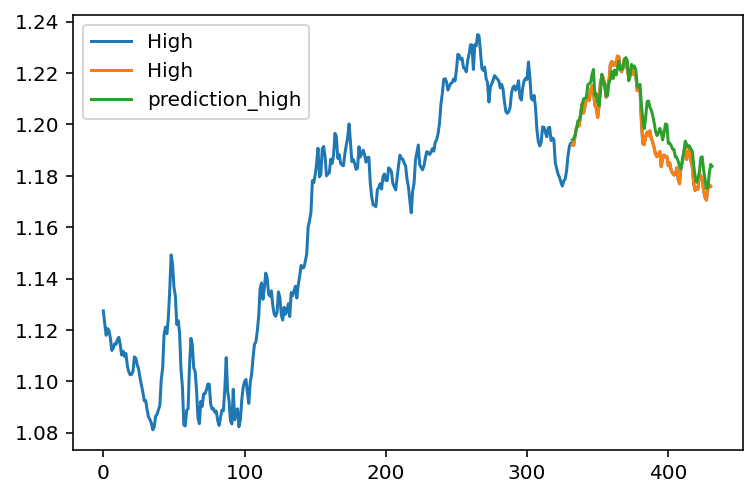

In [44]:
plt.plot(data['High'])
plt.plot(df_high['High'])
plt.plot(df_high['prediction_high'])
plt.legend(['High','High','prediction_high'])

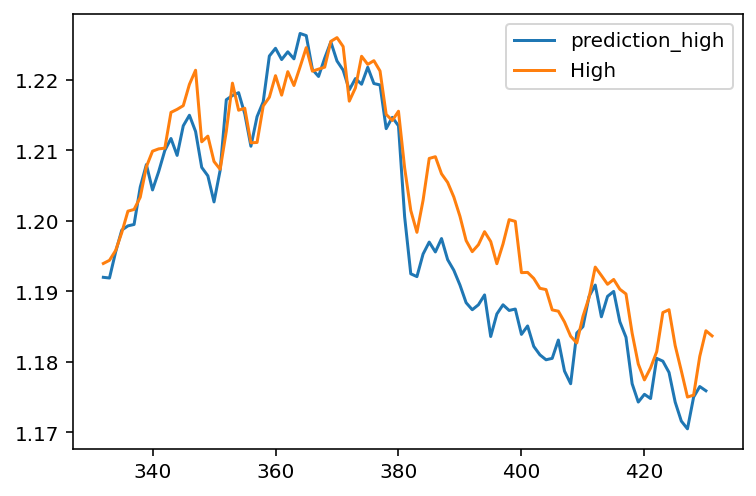

In [45]:
#ZOOM
plt.plot(df_high['High'])
plt.plot(df_high['prediction_high'])
plt.legend(['prediction_high','High'])

# LOW

In [46]:
data_low

,Low,cci1 CCI,RSI,STD
0,1.1154,122.0506,59.0486,0.0045
1,1.1161,59.7434,54.2091,0.0020
2,1.1123,5.7613,53.2478,0.0023
3,1.1154,50.9302,56.3939,0.0023
4,1.1132,6.0239,51.3584,0.0024
...,...,...,...,...
427,1.1662,-102.8018,37.1350,0.0033
428,1.1691,-39.3584,44.6483,0.0021
429,1.1725,11.4720,46.6920,0.0029
430,1.1731,22.4440,45.0294,0.0031


In [47]:
dataset = data_low.values
#dataset_test = data_test.values

In [48]:
scaler = MinMaxScaler()

In [49]:
training_data = scaler.fit_transform(dataset)
training_data

array([[0.31776275, 0.7593574 , 0.61966391, 0.21978022],
       [0.32206515, 0.63605157, 0.53595219, 0.08241758],
       [0.29870928, 0.52922109, 0.51932401, 0.0989011 ],
       ...,
       [0.66871543, 0.54052256, 0.40592443, 0.13186813],
       [0.6724032 , 0.56223613, 0.37716544, 0.14285714],
       [       nan,        nan,        nan,        nan]])

In [50]:
sc = MinMaxScaler()

In [51]:
features = training_data
target = training_data[:,0]

In [52]:
TimeseriesGenerator(features, target,length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.31776275, 0.7593574 , 0.61966391, 0.21978022],
         [0.32206515, 0.63605157, 0.53595219, 0.08241758]]]),
 array([0.29870928]))

In [53]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 123, shuffle = False)

In [54]:
look_back = 30
batch_size = 32
num_feture = x_train.shape[1]
train_generator = TimeseriesGenerator(x_train, y_train,length=look_back, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length=look_back, sampling_rate=1, batch_size=batch_size)

In [55]:
test_generator

In [56]:
model = Sequential()

In [57]:
model.add(LSTM(128, input_shape=(look_back, num_feture),return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM( 64, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit_generator(train_generator, epochs=300).history
model.save('lstm_low_multi.h5')

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
9/9 [==============================] - 5s 68ms/step - loss: 0.0479
Epoch 2/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0524
Epoch 3/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0268
Epoch 4/300
9/9 [==============================] - 1s 64ms/step - loss: 0.0285
Epoch 5/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0238
Epoch 6/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0218
Epoch 7/300
9/9 [==============================] - 1s 64ms/step - loss: 0.0166
Epoch 8/300
9/9 [==============================] - 1s 66ms/step - loss: 0.0192
Epoch 9/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0146
Epoch 10/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0097
Epoch 11/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0082
Epoch 12/300
9/9 [==============================] - 1s 66ms/step - loss: 0.0079
Epoch 13/300
9/9 [==============================]

9/9 [==============================] - 1s 62ms/step - loss: 0.0027
Epoch 104/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0036
Epoch 105/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0035
Epoch 106/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0035
Epoch 107/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0028
Epoch 108/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0035
Epoch 109/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0035
Epoch 110/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0032
Epoch 111/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0022
Epoch 112/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0032
Epoch 113/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0032
Epoch 114/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0026
Epoch 115/300
9/9 [=======================

9/9 [==============================] - 1s 61ms/step - loss: 0.0028
Epoch 205/300
9/9 [==============================] - 1s 65ms/step - loss: 0.0019
Epoch 206/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0024
Epoch 207/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0023
Epoch 208/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0031
Epoch 209/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0023
Epoch 210/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0024
Epoch 211/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0031
Epoch 212/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0021
Epoch 213/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0025
Epoch 214/300
9/9 [==============================] - 1s 63ms/step - loss: 0.0020
Epoch 215/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0019
Epoch 216/300
9/9 [=======================

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 128)           68096     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 249,153
Trainable params: 249,153
Non-trainable params: 0
________________________________________________

In [59]:
predictions = model.predict_generator(test_generator)

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [60]:
rmse = np.sqrt(np.mean(predictions - y_test[-predictions.shape[0]])**2)
rmse

0.003764138789847493

In [61]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][look_back:])], axis=1)
rev_trans = scaler.inverse_transform(df_pred)
open_pred = rev_trans[:,0]
open_pred = open_pred.reshape(-1,1)
df_low = pd.DataFrame(data_low.iloc[-len(open_pred):,0])
df_low['prediction_low'] = open_pred
df_low

,Low,prediction_low
332,1.1866,1.177272
333,1.1869,1.177209
334,1.1877,1.178654
335,1.1947,1.181851
336,1.1954,1.185735
...,...,...
427,1.1662,1.160596
428,1.1691,1.161231
429,1.1725,1.166905
430,1.1731,1.170595


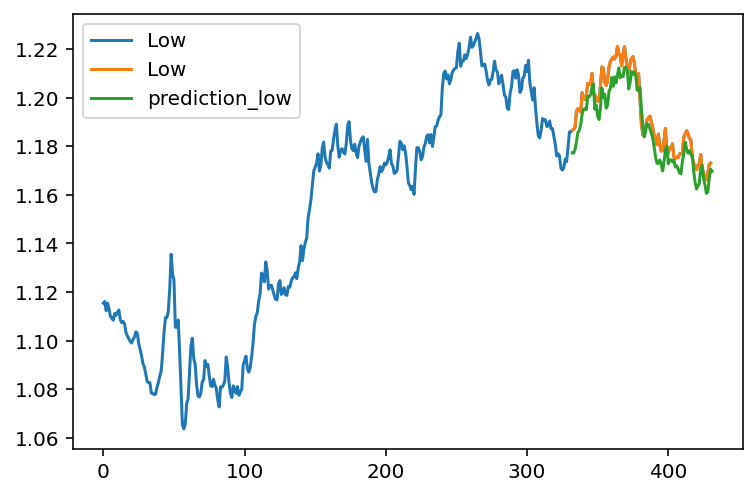

In [62]:
plt.plot(data['Low'])
plt.plot(df_low['Low'])
plt.plot(df_low['prediction_low'])
plt.legend(['Low','Low','prediction_low'])

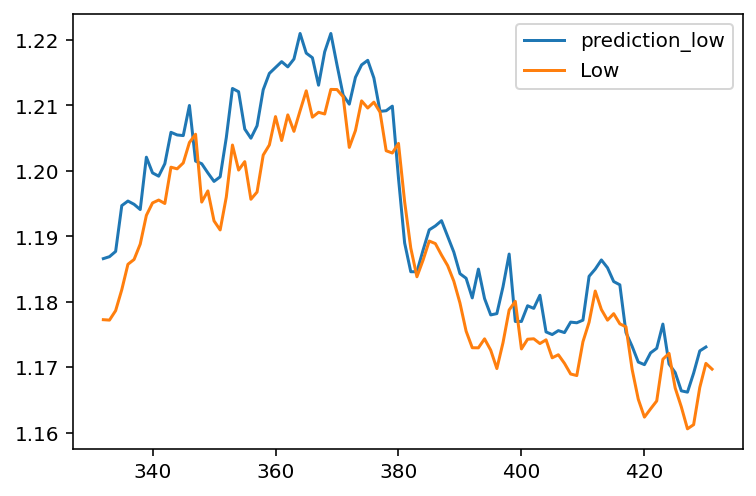

In [63]:
#ZOOM
plt.plot(df_low['Low'])
plt.plot(df_low['prediction_low'])
plt.legend(['prediction_low','Low'])

# CLOSE

In [64]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'boll', 'boll1 Upper', 'boll1 Mid',
       'stoc_sl1 %KS', 'stoc_sl1 %DS', 'cci1 CCI', 'RSI', 'STD'],
      dtype='object')

In [65]:
data_close = data.filter(regex='Close|boll1 Mid|CCI|RSI',axis=1)

In [66]:
data_close.columns

Index(['Close', 'boll1 Mid', 'cci1 CCI', 'RSI'], dtype='object')

In [67]:
#data_col = list(data_close.columns)

In [68]:
#data_col[0],data_col[2] = data_col[2],data_col[0]
#data_close = data_close[data_col]

In [69]:
data_close 

,Close,boll1 Mid,cci1 CCI,RSI
0,1.1213,1.1133,122.0506,59.0486
1,1.1169,1.1137,59.7434,54.2091
2,1.1160,1.1142,5.7613,53.2478
3,1.1194,1.1148,50.9302,56.3939
4,1.1148,1.1151,6.0239,51.3584
...,...,...,...,...
427,1.1695,1.1781,-102.8018,37.1350
428,1.1742,1.1780,-39.3584,44.6483
429,1.1756,1.1777,11.4720,46.6920
430,1.1743,1.1772,22.4440,45.0294


In [70]:
dataset = data_close.values
#dataset_test = data_test.values

In [71]:
scaler = MinMaxScaler()

In [72]:
training_data = scaler.fit_transform(dataset)
training_data

array([[0.33213429, 0.20189504, 0.7593574 , 0.61966391],
       [0.3057554 , 0.2048105 , 0.63605157, 0.53595219],
       [0.30035971, 0.20845481, 0.52922109, 0.51932401],
       ...,
       [0.65767386, 0.6712828 , 0.54052256, 0.40592443],
       [0.6498801 , 0.66763848, 0.56223613, 0.37716544],
       [       nan,        nan,        nan,        nan]])

In [73]:
sc = MinMaxScaler()

In [74]:
features = training_data
target = training_data[:,0]

In [75]:
TimeseriesGenerator(features, target,length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.33213429, 0.20189504, 0.7593574 , 0.61966391],
         [0.3057554 , 0.2048105 , 0.63605157, 0.53595219]]]),
 array([0.30035971]))

In [76]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 123, shuffle = False)

In [77]:
look_back = 30
batch_size = 32
num_feture = x_train.shape[1]
train_generator = TimeseriesGenerator(x_train, y_train,length=look_back, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length=look_back, sampling_rate=1, batch_size=batch_size)

In [78]:
test_generator

In [79]:
model = Sequential()

In [80]:
model.add(LSTM(128, input_shape=(look_back, num_feture),return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM( 64, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit_generator(train_generator, epochs=300).history
model.save('lstm_close_multi.h5')

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
9/9 [==============================] - 9s 92ms/step - loss: 0.0543
Epoch 2/300
9/9 [==============================] - 1s 79ms/step - loss: 0.0426
Epoch 3/300
9/9 [==============================] - 1s 89ms/step - loss: 0.0463
Epoch 4/300
9/9 [==============================] - 1s 112ms/step - loss: 0.0183
Epoch 5/300
9/9 [==============================] - 1s 115ms/step - loss: 0.0139
Epoch 6/300
9/9 [==============================] - 1s 109ms/step - loss: 0.0123
Epoch 7/300
9/9 [==============================] - 1s 112ms/step - loss: 0.0100
Epoch 8/300
9/9 [==============================] - 1s 90ms/step - loss: 0.0169
Epoch 9/300
9/9 [==============================] - 1s 86ms/step - loss: 0.0104
Epoch 10/300
9/9 [==============================] - 1s 82ms/step - loss: 0.0083
Epoch 11/300
9/9 [==============================] - 1s 83ms/step - loss: 0.0082
Epoch 12/300
9/9 [==============================] - 1s 82ms/step - loss: 0.0105
Epoch 13/300
9/9 [===========================

9/9 [==============================] - 1s 83ms/step - loss: 0.0039
Epoch 104/300
9/9 [==============================] - 1s 86ms/step - loss: 0.0046
Epoch 105/300
9/9 [==============================] - 1s 109ms/step - loss: 0.0049
Epoch 106/300
9/9 [==============================] - 1s 88ms/step - loss: 0.0049
Epoch 107/300
9/9 [==============================] - 1s 104ms/step - loss: 0.0048
Epoch 108/300
9/9 [==============================] - 1s 76ms/step - loss: 0.0043
Epoch 109/300
9/9 [==============================] - 1s 87ms/step - loss: 0.0053
Epoch 110/300
9/9 [==============================] - 1s 84ms/step - loss: 0.0056
Epoch 111/300
9/9 [==============================] - 1s 86ms/step - loss: 0.0045
Epoch 112/300
9/9 [==============================] - 1s 75ms/step - loss: 0.0040
Epoch 113/300
9/9 [==============================] - 1s 71ms/step - loss: 0.0037
Epoch 114/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0042
Epoch 115/300
9/9 [=====================

9/9 [==============================] - 1s 68ms/step - loss: 0.0022
Epoch 205/300
9/9 [==============================] - 1s 70ms/step - loss: 0.0028
Epoch 206/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0026
Epoch 207/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0037
Epoch 208/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0035
Epoch 209/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0038
Epoch 210/300
9/9 [==============================] - 1s 69ms/step - loss: 0.0040
Epoch 211/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0036
Epoch 212/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0027
Epoch 213/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0029
Epoch 214/300
9/9 [==============================] - 1s 67ms/step - loss: 0.0031
Epoch 215/300
9/9 [==============================] - 1s 68ms/step - loss: 0.0033
Epoch 216/300
9/9 [=======================

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 128)           68096     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 249,153
Trainable params: 249,153
Non-trainable params: 0
________________________________________________

In [82]:
predictions = model.predict_generator(test_generator)

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [83]:
rmse = np.sqrt(np.mean(predictions - y_test[-predictions.shape[0]])**2)
rmse

0.03169935941696167

In [84]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][look_back:])], axis=1)
rev_trans = scaler.inverse_transform(df_pred)
open_pred = rev_trans[:,0]
open_pred = open_pred.reshape(-1,1)
df_close = pd.DataFrame(data_close.iloc[-len(open_pred):,0])
df_close['prediction_close'] = open_pred
df_close

,Close,prediction_close
332,1.1901,1.187788
333,1.1910,1.186628
334,1.1947,1.187252
335,1.1979,1.190060
336,1.1967,1.193167
...,...,...
427,1.1695,1.169001
428,1.1742,1.169810
429,1.1756,1.174947
430,1.1743,1.177806


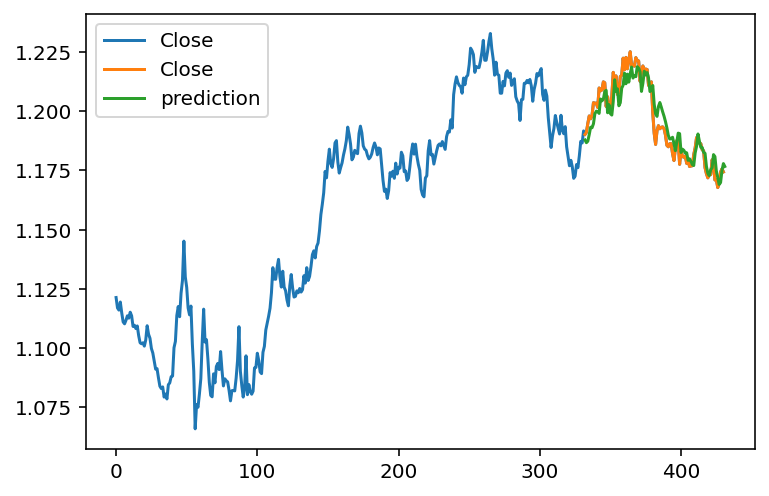

In [85]:
plt.plot(data['Close'])
plt.plot(df_close['Close'])
plt.plot(df_close['prediction_close'])
plt.legend(['Close','Close','prediction'])

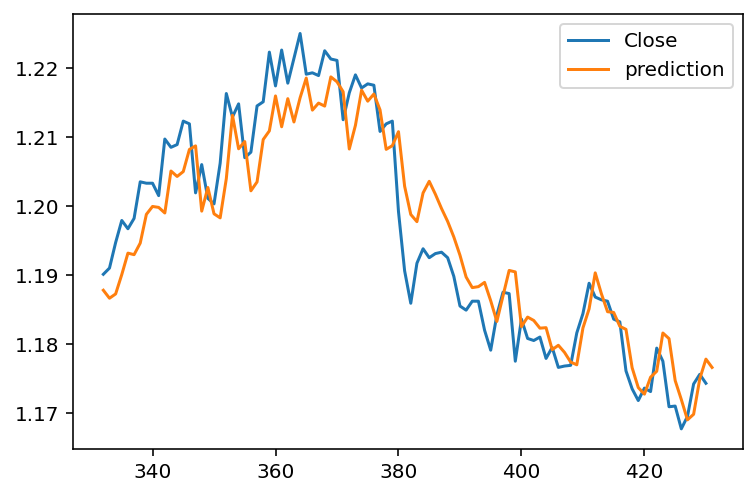

In [86]:
#ZOOM
plt.plot(df_close['Close'])
plt.plot(df_close['prediction_close'])
plt.legend(['Close','prediction'])

In [87]:
result = data.filter(regex='Open|High|Low|Close')

In [88]:
result = result.tail(len(open_pred))

In [89]:
result['Pre_Open'] = df_open['prediction_open']
result['Pre_High'] = df_high['prediction_high']
result['Pre_Low'] = df_low['prediction_low']
result['Pre_Close'] = df_close['prediction_close']

In [90]:
result = result.reset_index()

In [91]:
result.drop(columns=['index'],inplace = True)

In [93]:
'''
for i in range(len(result)):
    if result.loc[i,'Open'] - result.loc[i,'Close']>0:
        result['Ans'] = 'Green'
    elif result.loc[i,'Open'] - result.loc[i,'Close']<0:
        result['Ans'] = 'Red'
        
for i in range(len(result)):
    if result.loc[i,'Pre_Open'] > result.loc[i,'Pre_Close']:
        result['Pre_Ans'] = 'Green'
    elif result.loc[i,'Pre_Open'] < result.loc[i,'Pre_Close']:
        result['Pre_Ans'] = 'Red'
'''

result['Change'] = result['Close']-result['Open']
result['Pre_Change'] = result['Pre_Open']-result['Pre_Close']

for i in range(len(result)):
    if result.loc[i,'Change'] > 0:
        result.loc[i,'Ans'] = 'Green'
    elif result.loc[i,'Change'] < 0:
        result.loc[i,'Ans'] = 'Red'
        
for i in range(len(result)):
    if result.loc[i,'Pre_Change'] > 0:
        result.loc[i,'Pre_Ans'] = 'Green'
    elif result.loc[i,'Pre_Change'] < 0:
        result.loc[i,'Pre_Ans'] = 'Red'

In [94]:
result

,Open,High,Low,Close,Pre_Open,Pre_High,Pre_Low,Pre_Close,Change,Pre_Change,Ans,Pre_Ans
0,1.1915,1.1920,1.1866,1.1901,1.193524,1.193964,1.177272,1.187788,-0.0014,0.005737,Red,Green
1,1.1891,1.1919,1.1869,1.1910,1.193411,1.194413,1.177209,1.186628,0.0019,0.006783,Green,Green
2,1.1912,1.1956,1.1877,1.1947,1.194208,1.195807,1.178654,1.187252,0.0035,0.006956,Green,Green
3,1.1948,1.1987,1.1947,1.1979,1.196387,1.198352,1.181851,1.190060,0.0031,0.006327,Green,Green
4,1.1979,1.1993,1.1954,1.1967,1.199740,1.201390,1.185735,1.193167,-0.0012,0.006573,Red,Green
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.1677,1.1705,1.1662,1.1695,1.172732,1.175011,1.160596,1.169001,0.0018,0.003731,Green,Green
96,1.1694,1.1750,1.1691,1.1742,1.172667,1.175280,1.161231,1.169810,0.0048,0.002857,Green,Green
97,1.1745,1.1765,1.1725,1.1756,1.176534,1.180784,1.166905,1.174947,0.0011,0.001587,Green,Green
98,1.1756,1.1759,1.1731,1.1743,1.179208,1.184419,1.170595,1.177806,-0.0013,0.001402,Red,Green


In [95]:
result[1:50]

,Open,High,Low,Close,Pre_Open,Pre_High,Pre_Low,Pre_Close,Change,Pre_Change,Ans,Pre_Ans
1,1.1891,1.1919,1.1869,1.1910,1.193411,1.194413,1.177209,1.186628,0.0019,0.006783,Green,Green
2,1.1912,1.1956,1.1877,1.1947,1.194208,1.195807,1.178654,1.187252,0.0035,0.006956,Green,Green
3,1.1948,1.1987,1.1947,1.1979,1.196387,1.198352,1.181851,1.190060,0.0031,0.006327,Green,Green
4,1.1979,1.1993,1.1954,1.1967,1.199740,1.201390,1.185735,1.193167,-0.0012,0.006573,Red,Green
5,1.1968,1.1995,1.1949,1.1982,1.199577,1.201628,1.186475,1.192942,0.0014,0.006634,Green,Green
6,1.1975,1.2048,1.1941,1.2035,1.201130,1.203359,1.188816,1.194618,0.0060,0.006512,Green,Green
7,1.2035,1.2080,1.2021,1.2033,1.204494,1.207689,1.193214,1.198786,-0.0002,0.005709,Red,Green
8,1.2035,1.2044,1.1997,1.2033,1.207317,1.209901,1.195113,1.199930,-0.0002,0.007386,Red,Green
9,1.2035,1.2070,1.1992,1.2015,1.205438,1.210226,1.195550,1.199794,-0.0020,0.005644,Red,Green
10,1.2017,1.2100,1.2011,1.2097,1.207063,1.210330,1.195026,1.198984,0.0080,0.008078,Green,Green


In [96]:
result[51:]

,Open,High,Low,Close,Pre_Open,Pre_High,Pre_Low,Pre_Close,Change,Pre_Change,Ans,Pre_Ans
51,1.1862,1.1921,1.1846,1.1917,1.198333,1.198387,1.183829,1.197726,0.0055,0.000607,Green,Green
52,1.1918,1.1953,1.1879,1.1938,1.199025,1.202929,1.186369,1.201886,0.0020,-0.002861,Green,Red
53,1.1939,1.1970,1.1910,1.1925,1.199845,1.208868,1.189289,1.203575,-0.0014,-0.003730,Red,Red
54,1.1927,1.1956,1.1916,1.1931,1.199754,1.209115,1.188898,1.201706,0.0004,-0.001953,Green,Red
55,1.1929,1.1975,1.1924,1.1933,1.199075,1.206688,1.187146,1.199632,0.0004,-0.000557,Green,Red
56,1.1935,1.1945,1.1900,1.1925,1.199225,1.205460,1.185532,1.197756,-0.0010,0.001468,Red,Green
57,1.1925,1.1930,1.1876,1.1898,1.197469,1.203396,1.183157,1.195508,-0.0027,0.001961,Red,Green
58,1.1899,1.1909,1.1843,1.1855,1.195692,1.200653,1.179817,1.192867,-0.0044,0.002825,Red,Green
59,1.1856,1.1884,1.1836,1.1849,1.192613,1.197218,1.175522,1.189703,-0.0007,0.002910,Red,Green
60,1.1848,1.1874,1.1806,1.1862,1.190741,1.195640,1.172987,1.188168,0.0014,0.002573,Green,Green


In [97]:
import xlwings as xw

In [98]:
wb = xw.Book()
sht = wb.sheets["Sheet1"]
sht.range("A1").options(index=False).value = result